
# Проверка гипотез с помощью python.

## Задание

* Выполнить проверку предложенной гипотезы
* Выполнить проверку статистической гипотезы для проверки нормальности числовых признаков
* Проверка мультиколлинеарности
* Все статистические тесты должны быть выполнены с 95%-м уровнем достоверности (т.е. значение р < 0,05)

## Датасет

Как данные представлены заказчиком:

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Содержит идентификатор клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>Пол клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Является ли клиент пожилым гражданином</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Есть ли у клиента партнер</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Является ли клиент кормильцем</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Количество месяцев, в течение которых клиент оставался в компании</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Есть ли у клиента телефонная связь</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Есть ли у клиента несколько линий</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Интернет-провайдер клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Есть ли у клиента онлайн-безопасность</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Есть ли у клиента онлайн-резервное копирование</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Имеет ли клиент защиту устройства</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Есть ли у клиента техническая поддержка</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Есть ли у клиента потоковое телевидение</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Есть ли у клиента стриминговые сервисы</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>Срок действия контракта заказчика</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>имеет ли клиент безналичные счета</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>Способ оплаты клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>Сумма, взимаемая с клиента ежемесячно </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>Общая сумма, списанная с клиента</td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Ушел ли клиент</td>
<td>categorical</td>
</tr>
</tbody>
</table>

Описание от заказчика:

Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента.

Набор данных включает информацию :

- Клиенты, которые ушли в течение последнего месяца — колонка называется `Churn`
- Услуги, на которые подписался каждый клиент — телефон, несколько линий, интернет, онлайн-безопасность, резервное копирование, защита устройств, техническая поддержка, потоковое ТВ и фильмы.
- Информация о счетах клиентов — как долго они являются клиентами, контракт, способ оплаты, безналичные счета, ежемесячные платежи и общая сумма платежей.
- Демографическая информация о клиентах — пол, возраст, наличие партнеров и иждивенцев.

## 1. Импорт Библиотек 

Импортируйте необходимые библиотеки

In [3]:
!pip install scipy

  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # отобразить все колонки

from scipy import stats

## Данные

In [1]:
df = pd.read_csv("churn.csv")
df.head()

Приведение название колонок к корректным значениям по Pep8, т.е. snake_case.

In [10]:
# импорт библиотеки регулярных выражений
import re

column_names = list(df.columns)
lower_column_names = []
for word in column_names:
    lower_column_names.append(re.sub('(?<!^)(?=[A-Z])', '_', word, count=1).lower())

df.columns = lower_column_names
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Описательный анализ данных

Рассмотрите данные — изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [11]:
# вывод строк, где имеются пробелы
df.loc[df['total_charges'] == ' '].head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


Строки с пробелами представляют новых клиентов, которые ничего еще не платили. Их целесообразно заполнить нулями

In [12]:
# заполнение строк нулямми
df.loc[df['total_charges'] == ' ', 'total_charges'] = 0

# приведение знаение total_charges к float
df.total_charges = df.total_charges.astype(float)

In [13]:
df.describe()

,senior_citizen,tenure,monthly_charges,total_charges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Выведем в процентном соотношение пожилых людей

In [15]:
df.senior_citizen.value_counts()/df.shape[0]*100

senior_citizen
0    83.785319
1    16.214681
Name: count, dtype: float64

In [20]:
# выведем количество мужчин и женщин
df.gender.value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

df.gender.value_counts()/df.shape['Male']*100

**Вывод:**
1. Среди клиентов 16 процентов пожилых.
2. Мужчин незначительно больше, чем женщин
3. Если проанализировать общую сумму, списанную с клиента, то в данном случае и медианное значение и среднее арифметическое будут практически равны. Это говорит о том, что сильных выбросов относительно общей картины не наблюдается, несмотря на то, что сумма, списываемая с клиента ежемесячно по отношению к показателямм медианы и среднего - разнятся.
4. Также разнится сильно количество месяцев, в течении которого клиент оставался в компании. И это нормально, поскольку есть много клиентов, которые только зарегистрировались, есть много тех, кто работает с компанием давно. Это говорит о том, что датасет охватывает большой промежуток времени, что может положительно сказаться на различных прогнозах и построении моделей.

### Уникальные значения для всех столбцов

Рассмотрите уникальные значения категориальных признаков. 

Сделайте вывод.

**Подсказка:** можете воспользоваться методом `describe(include='object')`

In [34]:
df.describe(include='object').T

,count,unique,top,freq
customer_id,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
partner,7043,2,No,3641
dependents,7043,2,No,4933
phone_service,7043,2,Yes,6361
multiple_lines,7043,3,No,3390
internet_service,7043,3,Fiber optic,3096
online_security,7043,3,No,3498
online_backup,7043,3,No,3088
device_protection,7043,3,No,3095


**Вывод:**
1. При том, что всего значений 7043 можно сделать вывод о равномерном распределении осносительно гендерного признака, о наличии партнера (у половины примерно есть), о наличии нескольких линий у клиентов (у половины есть), о наличии онлайн-безопасности (у половины есть).
2. Чаще всего люди предпочитают Fiberic optic в качестве интернет-провайдера.
3. У подавляющего большинства имеется телефон. Есть вероятность в некорректности данных, относительно наличия телефона. Тут можно проанализировать данный столбец и при необходимости заменить значения тем, который чаще всего встречается. Но, я думаю, на данном этапе это не требуется.

## 3. Предобработка данных

### Дубликаты

Предобработайте датасет — проверьте на наличие дубликатов и удалите, если они есть.

In [27]:
# удаляем дубликаы и выводим сумму
df.duplicated().sum()

0

### Отсутствующие значения

Пояснение к данному датасету:

Не всегда в данных есть явные пропуски, которые легко индексируются средствами Pandas. К сожалению, бывают проблемы с выгрузками данных, некачественными источниками, или, когда данные записываются вручную — часто присутствует человеческий фактор. По мере работы с новыми данными лучше проверять на наличие таких данных, иначе из-за этого исследование может исказиться.

Рассмотрим такой случай:

In [35]:
df.isna().sum()

customer_id          0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

Да, не видно пропусков. Но почему тогда столбец `TotalCharges` не отобразился изначально как числовой столбец?

Проверим все столбцы:

In [36]:
for col in df:
    if df[col].dtype == 'object':
        nans = df[col].apply(lambda x: len(x.strip())==0).sum()
        if nans > 0:
            print(f'Неявные пропуски столбца {col}:', df[col].apply(lambda x: len(x.strip())==0).sum())

Что мы можем сделать в таком случае?

1) По этому же фильтру удалить строки с пропусками, чтобы не искажать данные
2) Перевести тип столбца на числовой с параметром `errors = 'coerce'` и удалить

Но можно не удалять, чтобы не потерять данные, а:

1) Заменить значения на другое
2) Поменять на другое — но только в том случае, если есть какая-то зависимость в данных.

Давайте изменим тип и найдем зависимость:

In [38]:
df["total_charges"] = pd.to_numeric(df["total_charges"], errors = 'coerce')

df[df["total_charges"].isna()].T

""
customer_id
gender
senior_citizen
partner
dependents
tenure
phone_service
multiple_lines
internet_service
online_security


Нет дубликатов, нет пропусков. Это связано с тем, что я заранее заполнила пустые строки нулями.

**Но как выглядят наши данные обычно?**

In [39]:
df.sample(5)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
1531,7107-UBYKY,Female,0,Yes,Yes,35,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,25.75,882.55,No
6449,7601-WFVZV,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
6015,2325-NBPZG,Female,0,No,No,3,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.55,233.65,No
6209,3417-TSCIC,Male,0,No,No,29,No,No phone service,DSL,No,No,No,No,No,No,One year,Yes,Mailed check,24.85,788.05,No
2095,9300-RENDD,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.95,79.95,Yes


**Ничего не заметили?**

Может общая сумма, списанная с клиента, равна сумме, взимаемой с клиента ежемесячно, умноженной на количество времени?

Давайте посмотрим.

In [40]:
df[(df['total_charges'] / df['monthly_charges']) == df['tenure']].head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No


Нашей гипотезе есть место быть.

Значит `TotalCharges` = `MonthlyCharges` * время. В данном датасете указано только количество месяцев, без точного времени, потому будет грубо просто перемножить один столбец на другой. Но пропуски мы уже можем заменить на `0`, так как в тех строках `tenure` == 0.

Заменим пропуски на нужное нам число.

In [ ]:
# было сделано на начальном этапе
# df['TotalCharges'].fillna(0, inplace=True)

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [ ]:
# сделано выше

**Вывод:**
Тип данных int может существенно исказить картину, в частности на малых числах, показателях, коэффициентах. Поэтому целесообразно приводить данные именно к данному формату.



```
# Выбран кодовый формат
```

# 4. Проверка гипотез

Задание: сравнить две выборки - `Churn='No'` и `Churn='Yes'` 

Гипотеза — среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.

In [43]:
# создаем массив значений из отфильтрованного столбца датафрейма
a = df.loc[df.churn == 'No']['tenure'].values
b = df.loc[df.churn == 'Yes']['tenure'].values
# проверка дисперсии
print(np.var(a), np.var(b))

581.361842403119 381.2606667714428


In [44]:
# применим метод scipy.stats.ttest_ind() - определение равенства средних двух соседних совокупностей

alpha = 0.05
t_stat, pvalue = stats.ttest_ind(a, b)
if pvalue < alpha:
    print(f'P-value: {pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value: {pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value: 0.00000. Нулевая гипотеза отвергается


**Вывод:**
1. Как видим, большинство клиентов предпочитает оставаться и пользоваться услугами компании.
2. Поскольку нулевая гипотеза отвергается, можно сделать вывод о том, что среднее количество месяцев, в течении которого клиент остается в компании существено отличается между теми, кто в компании остался, и теми, кто прервал сотрудничество.

## 5. Статистический анализ на норму

Задание: выберите числовые признаки и проведите анализ — соответствуют ли распределения нормальному?

In [45]:
# распределение всех сумм оплаты за все время
c = df.total_charges.values

# проверка критерия Андерсона-Дарлинга
result = stats.anderson(c)
print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные выглядят нормально (не удается отклонить НО)')
    else:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные не выглядят нормально (отклоняем НО)')


Statistic: 346.638
Уровень значимости 15.00 % : критическое значение 0.576, данные не выглядят нормально (отклоняем НО)
Уровень значимости 10.00 % : критическое значение 0.656, данные не выглядят нормально (отклоняем НО)
Уровень значимости 5.00 % : критическое значение 0.787, данные не выглядят нормально (отклоняем НО)
Уровень значимости 2.50 % : критическое значение 0.917, данные не выглядят нормально (отклоняем НО)
Уровень значимости 1.00 % : критическое значение 1.091, данные не выглядят нормально (отклоняем НО)


Ранее не была установлена и импортирована библиотека matplotlib. Поэтому делаю это на данном этапе для визуализации данных.

In [48]:
!pip install matplotlib

  Using cached matplotlib-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 kB 7.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 kB 1.5 MB/s eta 0:00:00-:--:--
  Using cached Pillow-9.5.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.4 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [49]:
import matplotlib_inline

<Axes: >

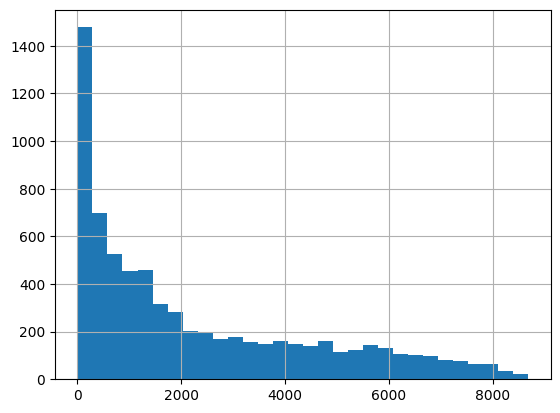

In [50]:
# построение гстограммы


df.total_charges.hist(bins=30)

**Вывод:**
1. На данном графике видим отрицательную криволинейную завимсимость.
2. Нормальное распределение отсуствует, это также было подтверждено расчетами, нулевая гипотеза была отвергнута

# Общий вывод

Опишите данные и результат исследования, основываясь на предыдущих шагах:

1. Изначальный датасет содержал в себе много пропусков(пробелов), которые целесообразно оказалось заменить 0 значениями, поскольку данные клиенты ничего не внесли в компанию. Никак не повлияли на общую выручку.
2. Общая сумма, списанная с клиента оказалась одинаковой, как при среднем значении, так и при медианном. Это хороший показатель, с помощью которого можно строить прогнозы относительно того, сколько денег можно будет заработать при увеличении числа клиентов. По идее это должно работать на больших количествах новых клиентов.
3. Нет тенденции относительно того, сколько клиент в компании. Нет никаких зависимостей. Возможно стоит этот показатель анализировать глубже, искать причины по которым так или иначе имеется отток клиентов. Однако подавляющее большинство остается клиентом компании долго.






